In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

## Gathering Data

In this project we are going to build a `bear detector`, that is a model which can differentiate between bear images and `teddy bears`.

For that we need a set of bear and `teddy bear` images.

To get those images we're going to use Microsoft's `bing`.

# clean
To download images with Bing Image Search, sign up at [Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', '6273c24c4aba4abca4ac8420b973d69f')

In [5]:
search_images_bing # Just typing the function name here shows where's it's defined

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [6]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

144

In [7]:
ims

(#144) ['https://www.goodfreephotos.com/albums/animals/mammals/grizzly-bear-in-the-wild.jpg','https://www.publicdomainpictures.net/pictures/240000/velka/grizzly-bear-portrait-1511961987XRY.jpg','https://external-preview.redd.it/EAlB-8gA4aSKTgnI3TOrtBuHsGuJMjqVuocmY2cUk_o.jpg?auto=webp&s=a0546c8b9734ba5744c54947c92dd9df108ff428','https://www.rwongphoto.com/images/xl/RW6844-2_web.jpg','https://bear.org/wp-content/uploads/2008/01/Griz-on-blue-shore.jpg','https://www.magazineup.com/wp-content/uploads/2020/05/pexels-brett-sayles-2555825-1536x1022.jpg','https://www.expeditionsalaska.com/wp-content/uploads/2017/04/16-brown-bear-photos-2377.jpg','https://1.bp.blogspot.com/_VgXaDXiFvX4/TOLc83-0DII/AAAAAAAAA9Y/aduLWx2jH7w/s1600/grizzly-bear.jpg','https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg','https://static01.nyt.com/images/2017/06/23/science/23GRIZZLY/23GRIZZLY-superJumbo.jpg'...]

We have created a list of URL images which are related to our search term, "grizzly bear".

We rely on the search the images are actually related to "grizzly bears" and not something else.

In [8]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

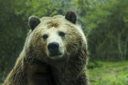

In [9]:
im = Image.open(dest)
im.to_thumb(128,128)

Let's create the paths for all the types of bears we're interestd in and download the images returned by `Bing` search.

In [10]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [11]:
if not path.exists():
    path.mkdir()
    for beear_type in bear_types:
        dest = (path/beear_type)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{beear_type} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [12]:
fns = get_image_files(path)
fns

(#419) [Path('bears/teddy/5f211e5b-37c4-4978-a12d-360196dbbcba.jpg'),Path('bears/teddy/dbf623da-821c-43e6-a8a5-043641853cb3.jpg'),Path('bears/teddy/846d37e4-2329-4084-9c78-2ef44ab39267.jpg'),Path('bears/teddy/250613e9-8298-402e-91c4-9f14bf61fc5a.jpg'),Path('bears/teddy/cf495595-5fd6-401a-9223-9f92bf30a3f0.jpg'),Path('bears/teddy/e254a51f-3189-49fa-8988-3836c06c5323.jpg'),Path('bears/teddy/36eba37e-8d6d-44c8-b9f5-66634e9d4ec9.jpg'),Path('bears/teddy/4677b437-f8c5-49e5-aeca-0bdb193e6539.jpg'),Path('bears/teddy/07ed260c-a5bd-42c2-8d62-63abdfe5a1e5.jpg'),Path('bears/teddy/f90da24e-8fee-4346-99bc-a4e305434288.jpg')...]

Check if we have any corrupted files with the following:

In [13]:
failed = verify_images(fns)
failed

(#12) [Path('bears/teddy/dbf623da-821c-43e6-a8a5-043641853cb3.jpg'),Path('bears/teddy/430e0225-bc11-4f9b-9e22-57cba3d5542e.jpg'),Path('bears/teddy/56ca53a2-c128-4246-aa88-dbdfe9e68d97.jpg'),Path('bears/teddy/c9b71978-1a6e-427d-aaf0-958eed538cbb.jpg'),Path('bears/teddy/dfee28e6-b57b-4d84-a56a-f23677db1642.jpg'),Path('bears/teddy/4252cbc7-e822-4b45-84a7-f29775b730ae.jpg'),Path('bears/grizzly/bae74f16-e379-4bdc-be0d-ac6c3abd767a.jpg'),Path('bears/grizzly/e6c37e36-9087-47e6-ae24-59647ffb53cf.jpg'),Path('bears/grizzly/2f5fae03-b95f-4682-be15-0e6fa1ad4b29.jpg'),Path('bears/black/e49895f8-8ac4-4f7c-aacb-6f9abe9402d2.jpg')...]

Let's remove the failed images by applying the `unlink()` function on them.

In [14]:
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

Jupyter notebooks have some assistive features.

In [16]:
# Open source of function
??verify_images

In [17]:
# Opens ipdb;User after a failed command
%debug

> <ipython-input-1-3a1df29346f4>(3)<cell line: 3>()
      1 #hide
      2 get_ipython().system(' [ -e /content ] && pip install -Uqq fastbook')
----> 3 import fastbook
      4 fastbook.setup_book()




PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 361, in set_quit
    sys.settrace(None)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/debugger.py", line 1075, in cmdloop
    sys.settrace(None)



--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


### End sidebar

Now that we have downloaded some data, we need to assemble it in a format suitable for model training. In fastai, that means creating an object called **DataLoaders**.

## From Data to DataLoaders

`DataLoaders` is a thin class which stores `DataLoader` objcts and makes them available via `train` and `valid`.

Here's how that looks:

In [18]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

To turn our downloaded data into a DataLoaders object we need to tell fastai at least four things:

1. What kinds of data we are working with
2. How to get the list of items
3. How to label these items
4. How to create the validation set

In [19]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Let's explain the arguments.

First we provide a tuple where we specify what types we want for the independent and dependent variables:

- `blocks=(ImageBlock, CategoryBlock)`

For this DataLoaders our underlying items will be file paths. We have to tell fastai how to get a list of those files. The get_image_files function takes a path, and returns a list of all of the images in that path (recursively, by default):

- `get_items=get_image_files`

We do a random split of validation and training images.
We set the `seed=42` so that each time we run the notebook, we get the same results for the image splits.

`splitter=RandomSplitter(valid_pct=0.2, seed=42)`

We use `fastai`'s `parent_label()` function to return the label of each image. The label of the image corresponds to the directory/folder it's stored in.

`get_y=parent_label`

We transform our images to a predfined size which our model will be trained on. `fastai` provides many transformers, here we use the `Resize()` transformer.

`item_tfms=Resize(128)`

This is like a template for creating a DataLoaders. We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:

In [20]:
dls = bears.dataloaders(path)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


`DataLoaders` includes the `train` and `valid` `Dataloaders`. The `DataLoader` is a class that contains the batches of those sets. Look into the notes of `Chapter 4` where we loop over the items in a `DataLoader` and train our model. The batch size is provided to the model on each epoch. When you loop through a `DataLoader` `fastai` will give you **64 items at a time by default  all stacked up into a single tensor**.

Let's look at a few of thes items.

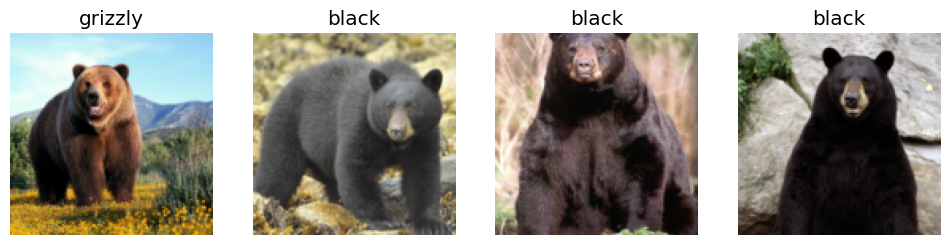

In [21]:
dls.valid.show_batch(max_n=4, nrows=1)

By **default `Resize` crops the images** to fit a square shape of the size requested, using the full width or height. This can result in losing some important details. **Alternatively, you can ask fastai to pad the images with zeros (black), or squish/stretch them**:

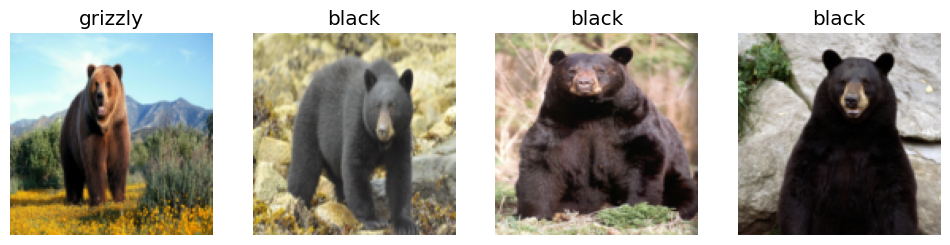

In [22]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

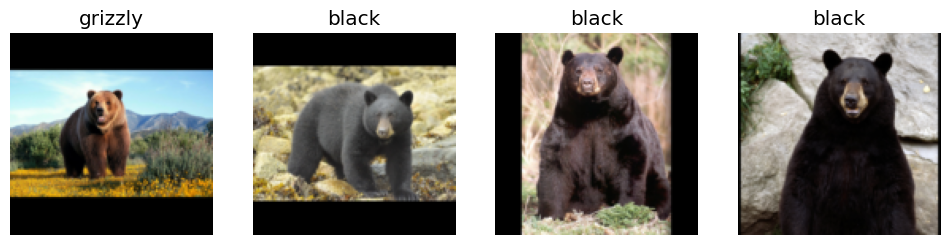

In [23]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

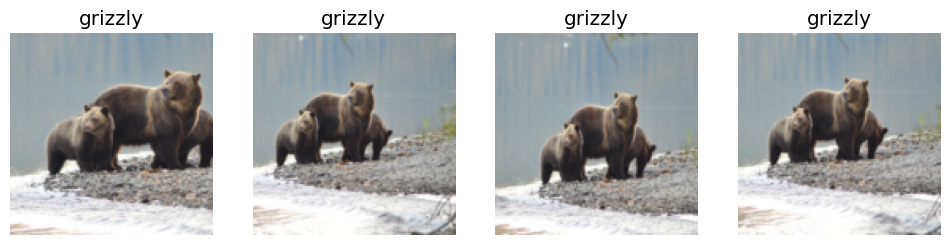

In [24]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Each of these transormations is wasteful.

- `Squishing` makes the bears look thin.
- `Padding` add redundant information to the inputs.
- `scaling` removes information from the images.

**Instead**, what we normally do **in practice is to randomly select part of the image, and crop to just that part**. **On each epoch** (which is one complete pass through all of our images in the dataset) **we randomly select a different part of each image**. This means that **our model can learn to focus on, and recognize, different features in our images**. **It** also **reflects how** images work in the real world: **different photos of the same thing may be framed in slightly different ways**.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

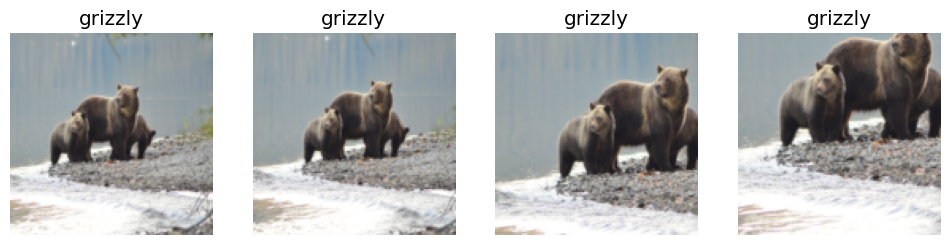

In [25]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

`Data Augmentation` refers to the creation of different variations of the same images. Commons variations include rotation, flipping, brightness change etc.

For natural images, such as in this case, we have found that `aug_transorms` produces the best results.

`aug_transorms` is a standard set of augmentations that we have found to work pretty well.

Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU - `batch_tfms`.

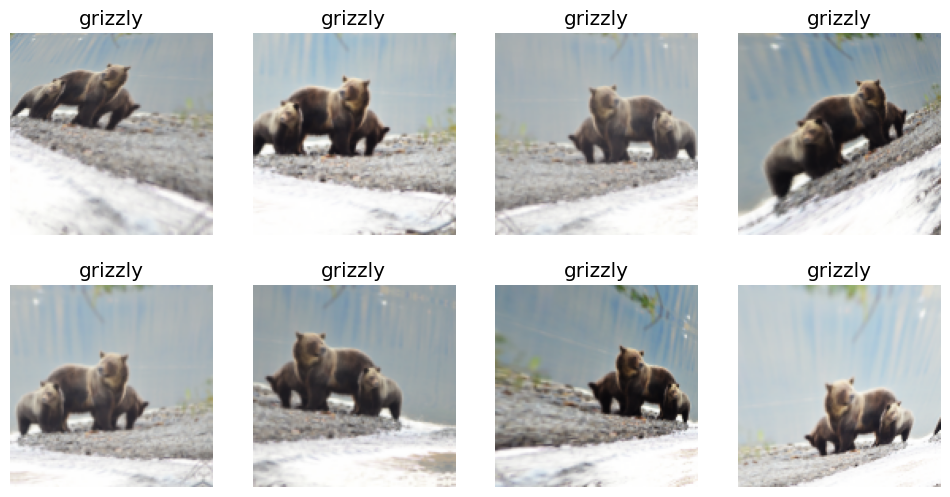

In [28]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

Now that we have assembled our data in a format fit for model training, let's actually train an image classifier using it.

Our training dataset consists of 150 images. To train the model we use `RandomREsizeCrop() with an image size of 224pixels.

We also, apply the `aug_transforms` - the transofmations which haven been found to work best.

In [29]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [30]:
# Create the model and train it for 4 epochs
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 43.5MB/s]


Create the confusion matrix to interpret the results the model produces.

Ideally, we want the main diagonal be blue and all the rest of the block completely white - no mistaken classifications.

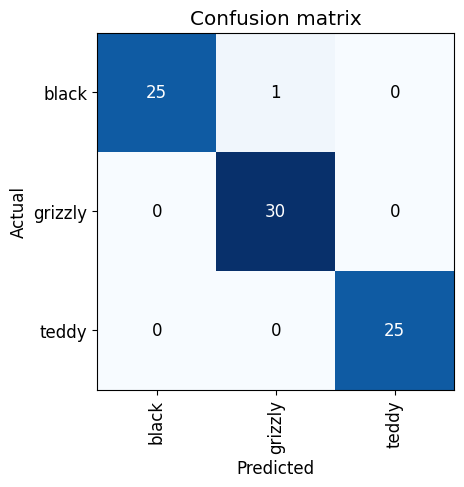

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

It's easy to see in which cases the errors are occuring. These might be related to dataset problems or model problems.

For example, data has been incorrectly classified. After all we're just using `bing` search.

The loss is a number that is higher if the model is incorrect (especially if it's also confident of its incorrect answer), or if it's correct, but not confident of its correct answer.

`plot_top_losses()` shows the images with the highest `loss`.

`Probability` is the confidence of the prediction.

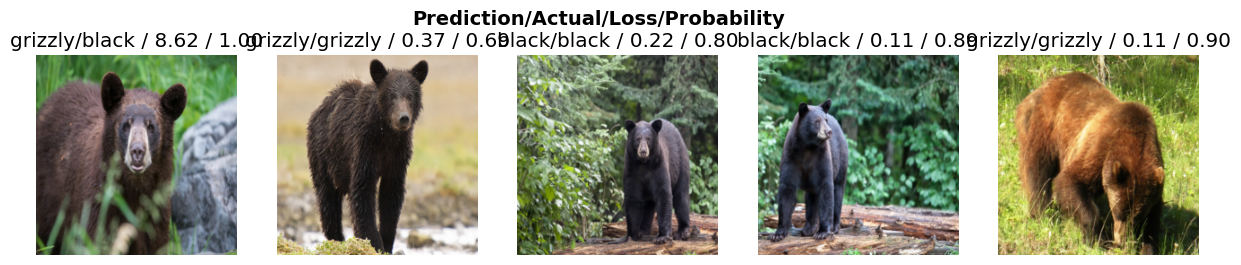

In [32]:
interp.plot_top_losses(5, nrows=1)

`fastai` includes a handy GUI for data cleaning called `ImageClassifierCleaner` that allows you to choose a category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [33]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [34]:
# Apply our changes using the cleaner
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

After some cleaning, we can retrain the model to see if the accuracy improves.

The `cleaner` removes the acrual files from the directories. So, we have to re-create our dataloaders before retraining the model.

In [36]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

## Turning Your Model into an Online Application

To create an application which provides the functionality of our model, we need to export our model.

`learn.export()` exports the architecture and the trained parameters.

### Using the Model for Inference

In [37]:
# Export the model = architecture + trained parameters into *.pkl
learn.export()

In [38]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [39]:
# Load the exported model
learn_inf = load_learner(path/'export.pkl')

In [44]:
# Test the model by running a prediction - inference
learn_inf.predict('images/grizzly.jpg')
# Returns a tupple which contains the predicted label and the probabilities for each category.

('grizzly', tensor(1), tensor([2.2483e-06, 1.0000e+00, 9.0329e-07]))

In [45]:
# The categories are cotained in the vocab attribute
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

The integer returned by `predict` shows the category index in `vocab`.

Notice how the provides an inference very fast compared to what it took for its training.

### Creating a Notebook App from the Model

This section examines how we can embed the model in a web application.

In [46]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [47]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [48]:
img = PILImage.create(btn_upload.data[-1])

In [49]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [50]:
pred,pred_idx,probs = learn_inf.predict(img)

In [51]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [52]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [53]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [54]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [55]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

We have everything working in this Jupyter notebook.

I skipped the rest which refers to exporting the model and creating a web application with it.

### Turning Your Notebook into a Real App

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila

### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?

It's a class which contains `DadaLoader` objects.

1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?

Use `seed`

1. What letters are often used to signify the independent and dependent variables?

`x` and `y`.

1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?

Data augmentation is the application of several transofmarmations on an image which don't change it's content but make it appear differently. Common data augmentations are changes in brightness and contrast, rotation etc.

It's needed to train the model to recognize the same image under different circumstances.

1. What is the difference between `item_tfms` and `batch_tfms`?

One is applied on the item, the other on a batch of items in the GPU.

1. What is a confusion matrix?

Shows the correlation between the correctly and wrongly predicted results.

1. What does `export` save?

Sames the model file `*.pkl` which includes the architecture and the trained parameters.

1. What is it called when we use a model for getting predictions, instead of training?

Inference.

1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?

When running the model in production, sometimes we might get input data which is in a different domain than the data we used to train the model with. In this case, the new data is called "out-of-domain".

1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.